# 중고차 가격 예측 경진대회 EDA  

중고차 시장 데이터를 이용하여 중고차 가격 예측을 예측하는 대회  
대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지 데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요

## 평가

In [66]:
import numpy as np

def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

`NMAE (Normalized Mean Absolute Error)`는 척도가 다른 데이터 세트의 MAE에 관한 비교를 용이하게 하기 위해서 정규화를 적용한 것  
정규화의 수단으로는 측정된 데이터의 평균을 사용  
즉, NMAE는 정규화된 MAE(평균 절대 오차)  
https://dacon.io/forum/405791?dtype=recent

## 변수
- id : 샘플 아이디  
- title : 제조사 모델명  
- odometer : 주행 거리  
- location : 판매처(나이지리아 도시)  
- isimported : 현지 사용 여부  
- engine : 엔진 종류  
- transmission : 트랜스미션 종류  
- fuel : 연료 종류  
- paint : 페인트 색상  
- year : 제조년도  
- target : 자동차 가격

## 데이터 불러오기 전처리

### 데이터 불러오기

In [67]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline  

plt.rcParams['font.family'] = 'Malgun Gothic'

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [68]:
train = pd.read_csv('train.csv', index_col = 'id')
test = pd.read_csv('test.csv', index_col = 'id')
submission = pd.read_csv('sample_submission.csv', index_col = 'id')

In [69]:
print(train.shape)
print(test.shape)

(1015, 10)
(436, 9)


In [70]:
train.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
id,,,,,,,,,,
0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


### 요약표

In [71]:
def resumetable(df) :
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index' : '피처'})
    summary['결측값 수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['1번째 값'] = df.loc[0].values
    summary['2번째 값'] = df.loc[1].values
    summary['3번째 값'] = df.loc[2].values
    
    return summary

In [72]:
resumetable(train)

데이터셋 형상 : (1015, 10)


,피처,데이터 타입,결측값 수,고윳값 개수,1번째 값,2번째 값,3번째 값
0,title,object,0,203,Toyota RAV 4,Toyota Land Cruiser,Land Rover Range Rover Evoque
1,odometer,int64,0,985,18277,10,83091
2,location,object,0,13,Lagos,Lagos,Lagos
3,isimported,object,0,3,Foreign Used,New,Foreign Used
4,engine,object,0,8,4-cylinder(I4),4-cylinder(I4),6-cylinder(V6)
5,transmission,object,0,2,automatic,automatic,automatic
6,fuel,object,0,2,petrol,petrol,petrol
7,paint,object,0,76,Red,Black,Red
8,year,int64,0,33,2016,2019,2012
9,target,int64,0,394,13665000,33015000,9915000


이 데이터는 결측값이 없는 데이터임을 알 수 있다.

In [73]:
train['title']

id
0                        Toyota RAV 4
1                 Toyota Land Cruiser
2       Land Rover Range Rover Evoque
3                        Lexus ES 350
4                        Toyota Venza
                    ...              
1010                   Toyota Corolla
1011                     Toyota Camry
1012                     Toyota Camry
1013                     Lexus GX 460
1014                           DAF CF
Name: title, Length: 1015, dtype: object

In [74]:
np.unique([s.split()[0] for s in train['title']])

array(['ALPINA', 'Acura', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DAF',
       'Dodge', 'Ford', 'GAC', 'GMC', 'Honda', 'Hyundai', 'IVECO', 'IVM',
       'Infiniti', 'Isuzu', 'Iveco', 'JMC', 'Jaguar', 'Jeep', 'Kia',
       'Land', 'Lexus', 'Lincoln', 'MAN-VOLKSWAGEN', 'MINI', 'Mack',
       'Man', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz/52', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Pontiac', 'Porsche', 'Rolls-Royce', 'Scania',
       'Toyota', 'Volkswagen', 'Volvo'], dtype='<U16')

브랜드명 + 제품명으로 되어있기 때문에 split을 이용해서 제조사명 구한다.  
$\rightarrow$   Land Rover은 브랜드명이 Land가 아니기 때문에 변환해줘야 함

In [75]:
train['title'] = train['title'].str.replace('Land Rover' ,'LandRover')

In [76]:
train['maker'] = [s[:len(s.split()[0])] for s in train['title']]
train.drop('title', axis = 1, inplace = True)

In [77]:
resumetable(train)

데이터셋 형상 : (1015, 10)


,피처,데이터 타입,결측값 수,고윳값 개수,1번째 값,2번째 값,3번째 값
0,odometer,int64,0,985,18277,10,83091
1,location,object,0,13,Lagos,Lagos,Lagos
2,isimported,object,0,3,Foreign Used,New,Foreign Used
3,engine,object,0,8,4-cylinder(I4),4-cylinder(I4),6-cylinder(V6)
4,transmission,object,0,2,automatic,automatic,automatic
5,fuel,object,0,2,petrol,petrol,petrol
6,paint,object,0,76,Red,Black,Red
7,year,int64,0,33,2016,2019,2012
8,target,int64,0,394,13665000,33015000,9915000
9,maker,object,0,42,Toyota,Toyota,LandRover


## 이진 변수

- transmission, fuel

In [78]:
bin_features = ['transmission', 'fuel']

In [79]:
train['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [80]:
train['fuel'].unique()

array(['petrol', 'diesel'], dtype=object)

- 0,1로 인코딩

In [81]:
train['transmission'] = train['transmission'].map({'automatic' : 0, 'manual' : 1})
train['fuel'] = train['fuel'].map({'petrol' : 0, 'diesel' : 1})

In [82]:
train['transmission'] = train['transmission'].astype(object)
train['fuel'] = train['fuel'].astype(object)

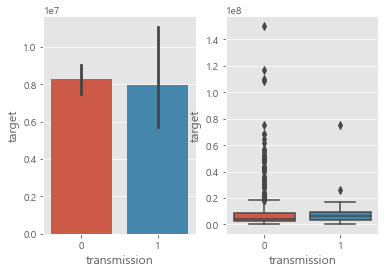

In [83]:
fig, ax = plt.subplots(1, 2)
sns.barplot(x = 'transmission', y = 'target', data = train, ax = ax[0])
sns.boxplot(x = 'transmission', y = 'target', data = train, ax = ax[1])
plt.show()

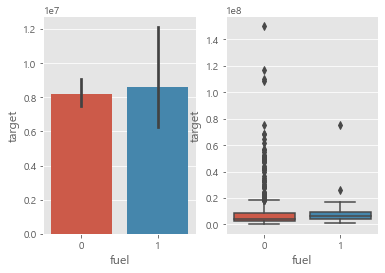

In [84]:
fig, ax = plt.subplots(1, 2)
sns.barplot(x = 'fuel', y = 'target', data = train, ax = ax[0])
sns.boxplot(x = 'fuel', y = 'target', data = train, ax = ax[1])
plt.show()

In [85]:
train['trans_fuel'] = train['transmission'].astype(str) + train['fuel'].astype(str)

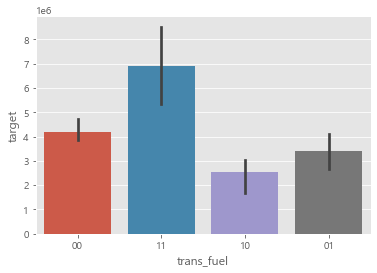

In [86]:
sns.barplot(x = 'trans_fuel', y = 'target', data = train,
            estimator = np.median)
plt.show()

## 타겟 변수

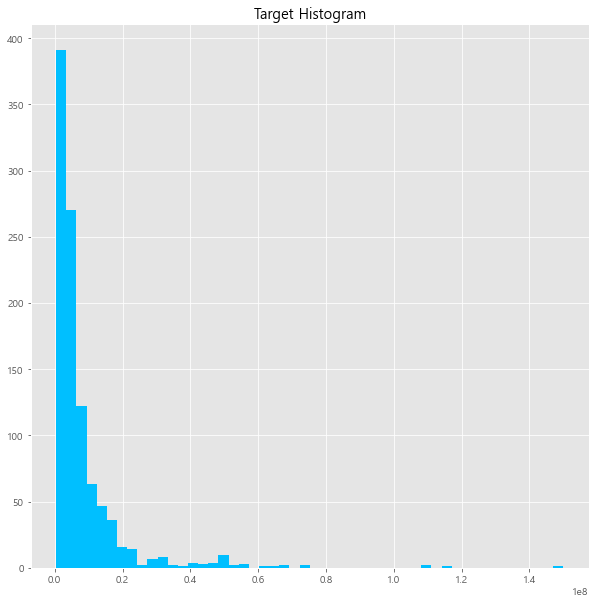

In [87]:
plt.figure(figsize=(10,10))
plt.hist(train['target'], bins=50, color='deepskyblue')
plt.title('Target Histogram')
plt.show()

상당히 높은 중고차 가격들이 편차가 심하게 분포되어있는 것과 오른쪽 꼬리가 긴 것을 확인 할 수 있다. 가격 데이터이므로 납득이 가는 결과로 볼 수 있다. 이와 같은 경우 우리는 로그 변환 사용을 고려해 볼 수 있다.
로그변환을 사용하여 정규분포와 가깝도록 변환시켜주면 좀 더 데이터 분석에 효과적이라고 볼 수 있다!

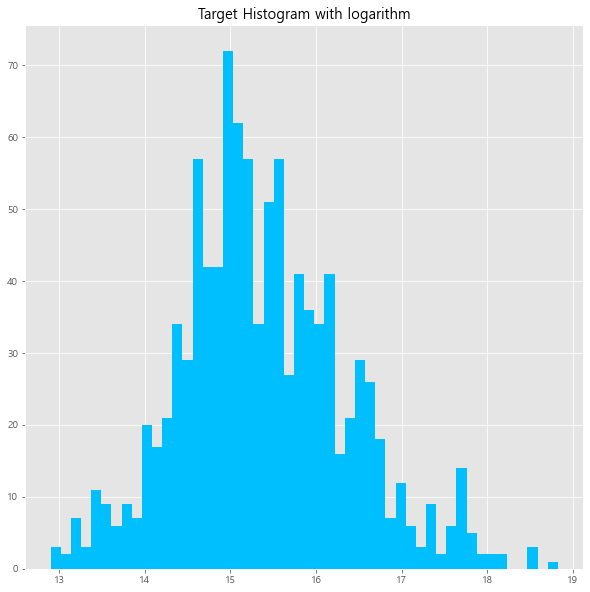

In [88]:
log_target = np.log(train['target'])
plt.figure(figsize=(10,10))
plt.hist(log_target, bins=50,color='deepskyblue')
plt.title('Target Histogram with logarithm')
plt.show()

타겟 변수를 로그변환한 뒤 정규성을 확인 해보았다.

## 수치형 변수

- odometer, year

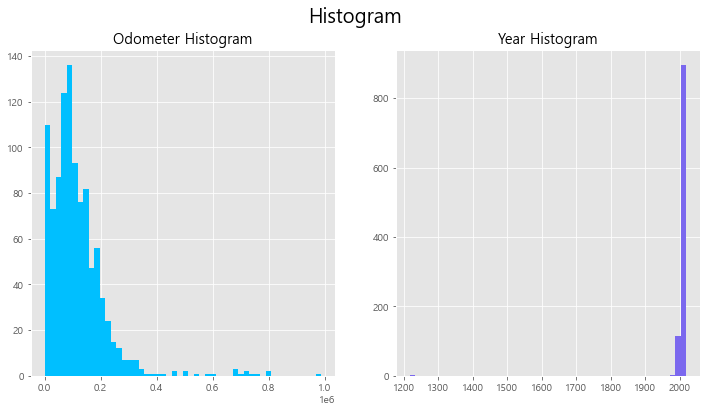

In [89]:
plt.style.use("ggplot")

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
plt.hist(train.odometer, bins=50,color='deepskyblue')
plt.title('Odometer Histogram')

plt.subplot(1,2,2)
plt.hist(train.year, bins=50,color='mediumslateblue')
plt.title('Year Histogram')
plt.show()

그래프를 보면, year에서 1900년도 이하인 데이터도 존재하여 데이터 분포 범위가 1200 범위부터 시작되어있는 것을 확인하였는데 잘못 기입된 데이터인지 한번 확인해볼 필요가 있다.

In [90]:
train[train['year'] < 1900]

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,trans_fuel
id,,,,,,,,,,,
415,403461,Lagos,Locally used,4-cylinder(I4),1,1,white,1218,6015000,Mercedes-Benz,11
827,510053,Lagos,Locally used,6-cylinder(V6),1,1,white,1217,75015000,Mercedes-Benz/52,11


위의 year에서 1218, 1217 데이터가 존재  
잘못 기입된 데이터라고 판단될 수 있으므로 제거

In [91]:
train = train[train['year'] > 1900]
train.shape

(1013, 11)

In [92]:
train

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,trans_fuel
id,,,,,,,,,,,
0,18277,Lagos,Foreign Used,4-cylinder(I4),0,0,Red,2016,13665000,Toyota,00
1,10,Lagos,New,4-cylinder(I4),0,0,Black,2019,33015000,Toyota,00
2,83091,Lagos,Foreign Used,6-cylinder(V6),0,0,Red,2012,9915000,LandRover,00
3,91524,Lagos,Foreign Used,4-cylinder(I4),0,0,Gray,2007,3815000,Lexus,00
4,94177,Lagos,Foreign Used,6-cylinder(V6),0,0,Red,2010,7385000,Toyota,00
...,...,...,...,...,...,...,...,...,...,...,...
1010,46768,Lagos,Foreign Used,4-cylinder(I4),0,0,Black,2014,5415000,Toyota,00
1011,31600,Abuja,Foreign Used,4-cylinder(I4),0,0,Silver,2011,3615000,Toyota,00
1012,96802,Abuja,Foreign Used,4-cylinder(I4),0,0,Black,2011,3415000,Toyota,00


In [93]:
data_description = train.describe().iloc[:,0:2]
data_description

,odometer,year
count,1013.000000,1013.000000
mean,116171.015795,2009.946693
std,104147.052690,5.540466
min,0.000000,1980.000000
25%,55775.000000,2006.000000
50%,94803.000000,2010.000000
75%,152878.000000,2014.000000
max,987322.000000,2020.000000


In [94]:
print('odometer 평균은', round(data_description['odometer']['mean']), '입니다')
print('odometer 중앙값은', round(data_description['odometer']['50%']), '입니다')

odometer 평균은 116171 입니다
odometer 중앙값은 94803 입니다


평균 주행거리는 116171, 중앙값은 94803으로 평균에 비해 중앙값이 좌측으로 치우쳐져 있다.  
또한 데이터 분포를 보면 좌편향 되어있는 것을 보아 주행거리가 데이터 평균에 비하여 매우 큰 값이 드물게 존재하는 것을 확인해볼 수 있다.  
$\rightarrow$  따라서 주행거리 0 ~ 987,322 사이 범위에서 비교적 적은 거리의 데이터가 많이 분포한다 것을 확인하였습니다.

In [95]:
print('year 평균은', round(data_description['year']['mean']), '입니다')
print('year 중앙값은', round(data_description['year']['50%']), '입니다')

year 평균은 2010 입니다
year 중앙값은 2010 입니다


평균과 중앙값이 2010년도 인 것을 알 수 있다.  
또한 데이터 분포를 보면 우편향 되어있는 것을 보아 연식이 데이터 평균에 비하여 매우 작은 값이 드물게 존재하는 것을 확인해볼 수 있다.  
$\rightarrow$ 따라서 1980~2020 범위에서 비교적 최신 연도의 데이터가 많이 분포한다는 것을 확인하였다.

<AxesSubplot:xlabel='odometer', ylabel='target'>

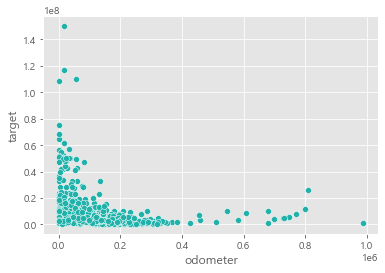

In [96]:
sns.scatterplot(x = 'odometer', y = 'target', data = train,color='lightseagreen')

In [97]:
train['logy'] = np.log(train['target'])

<AxesSubplot:xlabel='odometer', ylabel='logy'>

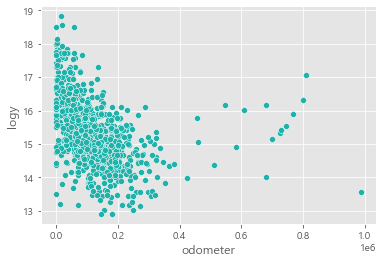

In [98]:
sns.scatterplot(x = 'odometer', y = 'logy', data = train,color='lightseagreen')

In [99]:
train['year_diff'] = [2020-s for s in train['year']]

<AxesSubplot:xlabel='year_diff', ylabel='logy'>

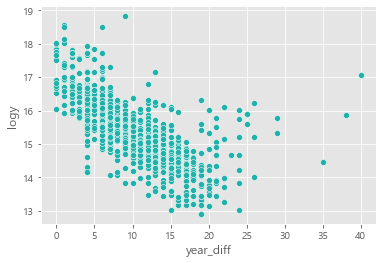

In [100]:
sns.scatterplot(x = 'year_diff', y = 'logy', data = train,color='lightseagreen')

## 명목형 변수

In [101]:
train.describe(include="object")

,location,isimported,engine,transmission,fuel,paint,maker,trans_fuel
count,1013,1013,1013,1013,1013,1013,1013,1013
unique,13,3,8,2,2,76,41,4
top,Lagos,Foreign Used,4-cylinder(I4),0,0,Black,Toyota,00
freq,790,744,617,965,970,292,474,963


In [102]:
train['isimported'] = train['isimported'].map({'New ' : 0,
                                               'Foreign Used' : 1,
                                               'Locally used' : 2})

In [103]:
train['isimported'] = train['isimported'].astype(object)
train['isimported'] 

id
0       1
1       0
2       1
3       1
4       1
       ..
1010    1
1011    1
1012    1
1013    1
1014    2
Name: isimported, Length: 1013, dtype: object

가장 많은 marker가 Toyota 차로 474대수가 있고, paint는 Black 색상으로 292대수가 있다.

- paint

In [104]:
train['paint'].value_counts()[:30]

Black         292
White         115
Silver        103
Grey           84
Blue           70
Red            53
Dark Grey      47
Gold           37
white          24
Green          18
Gray           17
Brown          16
Black          15
Dark Blue      14
Wine            8
Silver          5
red             5
Sliver          5
blue            5
Grey            3
Gold            3
Purple          3
Blue            3
Dark Ash        3
Ash             3
Dark blue       3
White           2
Sky blue        2
Dark gray       2
white-blue      2
Name: paint, dtype: int64

띄어쓰기, 대소문자가 고르지 못한 단어들이 보여서 통일성을 맞추려고 한다.

In [105]:
train['paint']=train['paint'].str.lstrip()

In [106]:
train['paint']=train['paint'].str.rstrip()

In [107]:
train['paint']=train['paint'].str.lower()

In [108]:
train['paint'].value_counts()

black                     309
white                     142
silver                    109
grey                       87
blue                       78
red                        58
dark grey                  48
gold                       41
green                      20
gray                       18
dark blue                  17
brown                      16
wine                        9
sliver                      5
cream                       4
dark ash                    4
purple                      3
yellow                      3
ash                         3
maroon                      2
dark gray                   2
milk                        2
deep blue                   2
sky blue                    2
white-blue                  2
black and silver            1
off white l                 1
off white                   1
light gold                  1
skye blue                   1
super white                 1
orange                      1
black sand pearl            1
ink blue  

In [109]:
train['paint'] = [s.replace('skye', 'sky') for s in train['paint']]
train['paint'] = [s.replace('redl', 'red') for s in train['paint']]
train['paint'] = [s.replace('gray', 'grey') for s in train['paint']]
train['paint'] = [s.replace('gery', 'grey') for s in train['paint']]
train['paint'] = [s.replace('sliver', 'silver') for s in train['paint']]
train['paint'] = [s.replace('whine', 'wine') for s in train['paint']]

In [110]:
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [111]:
train['paint'].value_counts()

black     312
grey      159
white     146
silver    117
blue      105
red        60
gold       42
green      21
brown      17
wine       10
ash         8
cream       4
purple      3
yellow      3
milk        2
maroon      2
orange      1
beige       1
Name: paint, dtype: int64

In [112]:
train['location'] = train['location'].replace({'Lagos ' : 'Lagos',
                                           'Lagos State' : 'Lagos',
                                           'Abuja ' : 'Abuja',
                                           'Abia State' : 'Abia',
                                           'Ogun State' : 'Ogun'})

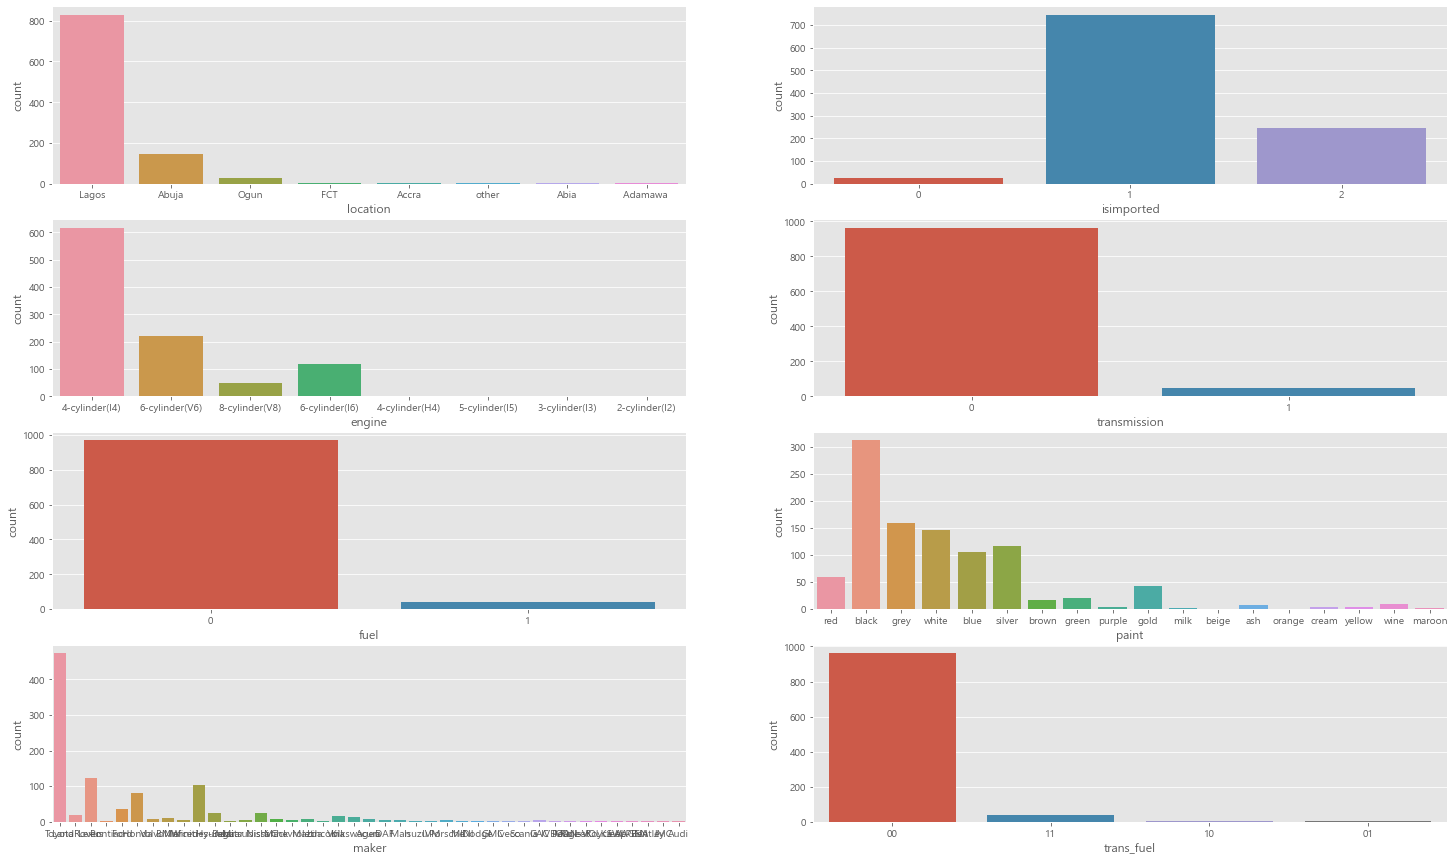

In [113]:
plt.style.use("ggplot")

plt.figure(figsize=(25,15))
count = 1

for i in train.describe(include="object").columns:
    plt.subplot(4,2,count)

    sns.countplot(data=train, x=i)
    count += 1

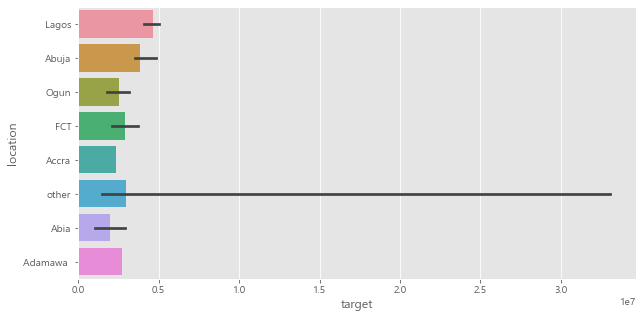

In [114]:
plt.figure(figsize = (10, 5))
sns.barplot(y = 'location', x = 'target', data = train,
            estimator = np.median)
plt.show()

<AxesSubplot:xlabel='target', ylabel='maker'>

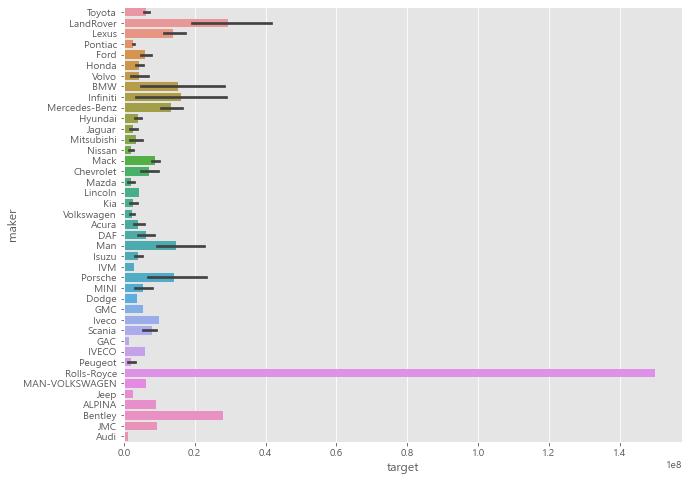

In [115]:
plt.figure(figsize = (10, 8))
sns.barplot(y = 'maker', x = 'target', data = train)

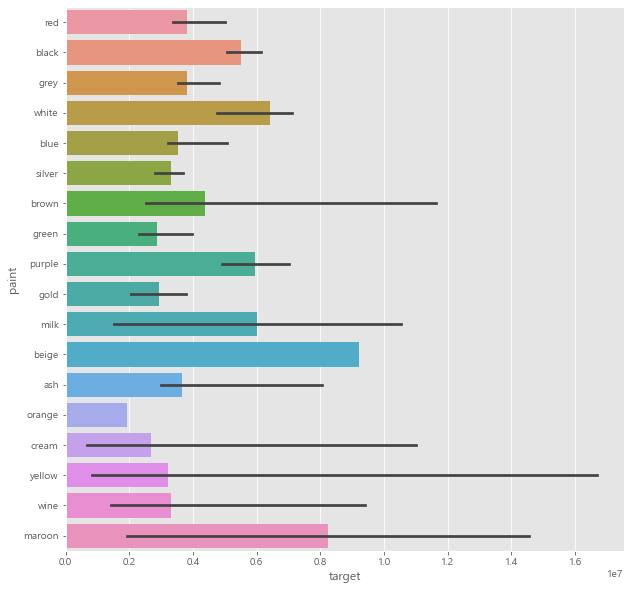

In [116]:
plt.figure(figsize = (10, 10))
sns.barplot(y = 'paint', x = 'target', data = train,
            estimator = np.median)
plt.show()

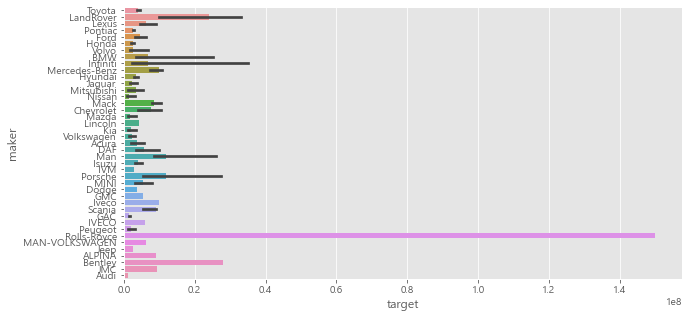

In [117]:
plt.figure(figsize = (10, 5))
sns.barplot(y = 'maker', x = 'target', data = train,
            estimator = np.median)
plt.show()

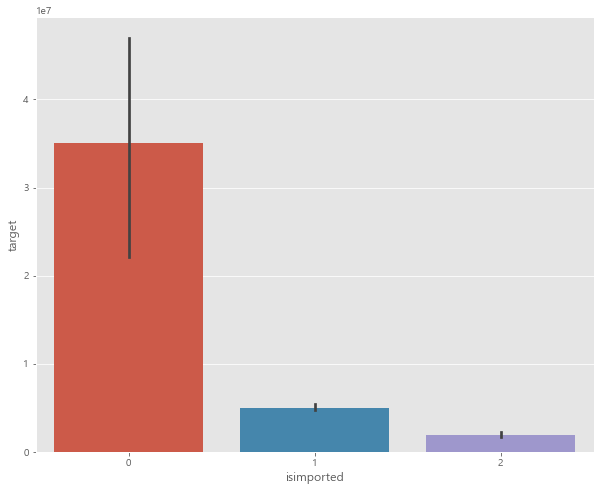

In [118]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'isimported', y = 'target', data = train,
            estimator = np.median)
plt.show()

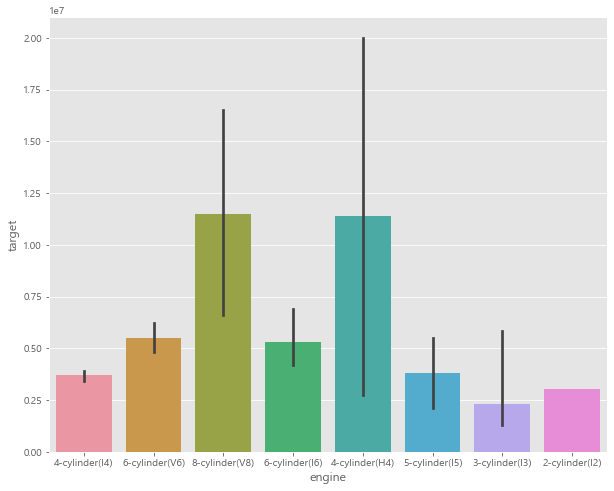

In [119]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'engine', y = 'target', data = train,
            estimator = np.median)
plt.show()

- title과 brand에서 Toyota가 압도적으로 많다는 것을 확인할 수 있다.  
- location에서 Lagos 지역이 압도적으로 많다는 것을 확인할 수 있다.
- isimported에서 0(New) 차는 적고, 1(Foreign Used)>2(Locally used)>0(New) 순으로 이루어진 것을 확인할 수 있다.  
- engine에서 4-cylinder가 압도적으로 많다는 것을 확인할 수 있다.  
- trainsmission에서 automatic가 압도적으로 많다는 것을 확인할 수 있다.  
- fuel에서 petrol가 압도적으로 많다는 것을 확인할 수 있다.  
- paint에서 black>grey>white>sliver>red>gold .. 순으로 이루어진 것을 확인할 수 있다.

## 비싼 차량의 가격

In [120]:
train['rank'] = train['target'].rank(ascending = False)
train['rank'] = train['rank'].astype(int)

In [121]:
train[train['maker'] == 'Rolls-Royce']

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,trans_fuel,logy,year_diff,rank
id,,,,,,,,,,,,,,
597,16069,Lagos,2,4-cylinder(I4),0,0,black,2011,150015008,Rolls-Royce,00,18.826246,9,1


In [122]:
train[train['rank'] < 20].sort_values(by = 'target', ascending = False)

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,trans_fuel,logy,year_diff,rank
id,,,,,,,,,,,,,,
597,16069,Lagos,2,4-cylinder(I4),0,0,black,2011,150015008,Rolls-Royce,00,18.826246,9,1
341,18720,Lagos,1,8-cylinder(V8),0,0,grey,2019,117015000,LandRover,00,18.577813,1,2
569,55530,Abuja,1,8-cylinder(V8),0,0,black,2014,110015000,Lexus,00,18.516127,6,3
736,20,Lagos,0,8-cylinder(V8),0,0,black,2019,108690000,Mercedes-Benz,00,18.504010,1,4
672,1931,Abuja,0,8-cylinder(V8),0,0,blue,2019,75015000,Lexus,00,18.133199,1,5
332,90,Lagos,1,8-cylinder(V8),0,0,black,2019,68265000,Mercedes-Benz,00,18.038908,1,6
432,467,Lagos,0,4-cylinder(I4),0,0,black,2020,68265000,BMW,00,18.038908,0,6
423,47,Lagos,0,4-cylinder(I4),0,0,black,2020,65015000,Toyota,00,17.990129,0,8
774,18297,Lagos,1,8-cylinder(V8),0,0,black,2016,62015000,Mercedes-Benz,00,17.942887,4,9


In [123]:
len(train[train['odometer']<20000])/len(train)

0.10957551826258638

In [124]:
train['low_distance'] = [1 if s < 20000 else 0 for s in train['odometer']]

<AxesSubplot:xlabel='low_distance', ylabel='target'>

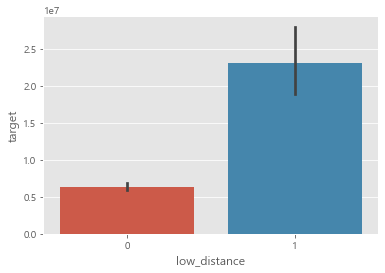

In [125]:
sns.barplot(x = 'low_distance', y = 'target', data = train)

In [126]:
train['pop_maker'] = [1 if s in train[train['rank'] < 20]['maker'].unique() else 0 for s in train['maker']]

<AxesSubplot:xlabel='pop_maker', ylabel='target'>

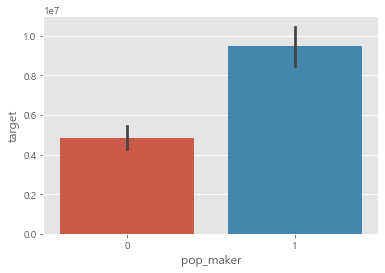

In [127]:
sns.barplot(x = 'pop_maker', y = 'target', data = train)

In [128]:
train['less3y'] = [1 if s < 3 else 0 for s in train['year_diff']]

<AxesSubplot:xlabel='less3y', ylabel='target'>

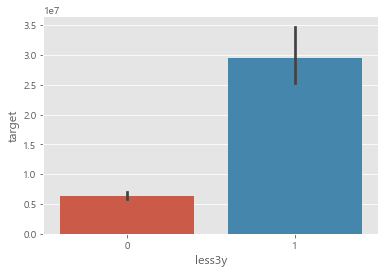

In [129]:
sns.barplot(x = 'less3y', y = 'target', data = train)

<AxesSubplot:xlabel='pop_color', ylabel='target'>

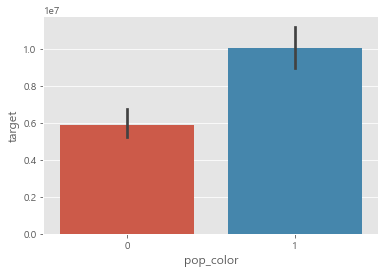

In [131]:
train['pop_color'] = [1 if ('white' in s or 'black' in s or 'blue' in s) else 0 for s in train['paint']]
sns.barplot(x = 'pop_color', y = 'target', data = train)

<AxesSubplot:xlabel='loc_lagos', ylabel='target'>

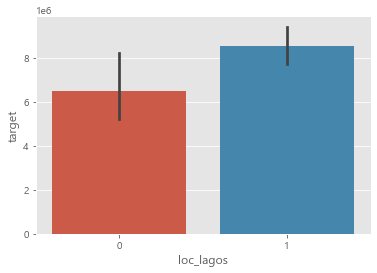

In [132]:
train['loc_lagos'] = [1 if s == 'Lagos' else 0 for s in train['location']]
sns.barplot(x = 'loc_lagos', y = 'target', data = train)

<AxesSubplot:xlabel='thisyear', ylabel='target'>

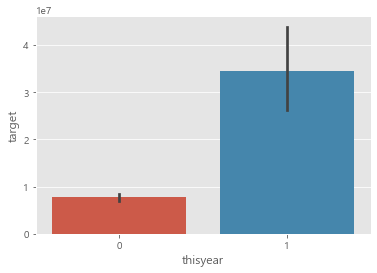

In [133]:
train['thisyear'] = [1 if s == 2020 else 0 for s in train['year']]
sns.barplot(x = 'thisyear', y = 'target', data = train)

## 200000000 이상

In [134]:
train['over20m'] = [1 if s >= 20000000 else 0 for s in train['target']]

In [135]:
train[train['over20m'] == 1]

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,...,logy,year_diff,rank,low_distance,pop_maker,less3y,pop_color,loc_lagos,thisyear,over20m
id,,,,,,,,,,,,,,,,,,,,,
1,10,Lagos,0,4-cylinder(I4),0,0,black,2019,33015000,Toyota,...,17.312473,1,41,1,1,1,1,1,0,1
9,27429,Lagos,1,6-cylinder(I6),0,0,blue,2018,23115000,Lexus,...,16.955992,2,61,0,1,1,1,1,0,1
49,32646,Lagos,1,6-cylinder(I6),0,0,white,2014,24015000,LandRover,...,16.994189,6,57,0,1,0,1,1,0,1
75,23568,Lagos,1,4-cylinder(I4),0,0,black,2018,48015000,Lexus,...,17.687024,2,25,0,1,1,1,1,0,1
90,77805,Lagos,1,4-cylinder(I4),0,0,black,2016,29015000,LandRover,...,17.183323,4,47,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,56770,Lagos,1,6-cylinder(I6),0,0,white,2018,49515000,Mercedes-Benz,...,17.717786,2,23,0,1,1,1,1,0,1
964,25141,Lagos,1,4-cylinder(I4),0,0,blue,2018,50015000,Lexus,...,17.727834,2,20,0,1,1,1,1,0,1
989,69,Lagos,0,4-cylinder(I4),0,0,grey,2020,47015000,Lexus,...,17.665977,0,27,1,1,1,0,1,1,1


In [180]:
maker_rank = train.groupby('maker')['target'].median().to_frame()
maker_rank['rank'] = maker_rank['target'].rank(ascending = False)

In [182]:
maker_rank.sort_values(by = 'rank')

,target,rank
maker,,
Rolls-Royce,150015008,1.0
Bentley,28015000,2.0
LandRover,24015000,3.0
Porsche,12015000,4.5
Man,12015000,4.5
Iveco,10015000,6.0
Mercedes-Benz,9915000,7.0
JMC,9365000,8.0
Scania,9215000,9.0


In [183]:
maker_rank.to_dict()

{'target': {'ALPINA': 9065000,
  'Acura': 3755000,
  'Audi': 1215000,
  'BMW': 6822500,
  'Bentley': 28015000,
  'Chevrolet': 7715000,
  'DAF': 5765000,
  'Dodge': 3815000,
  'Ford': 4597500,
  'GAC': 1465000,
  'GMC': 5515000,
  'Honda': 2515000,
  'Hyundai': 3447500,
  'IVECO': 6015000,
  'IVM': 2890000,
  'Infiniti': 6840000,
  'Isuzu': 4015000,
  'Iveco': 10015000,
  'JMC': 9365000,
  'Jaguar': 2325000,
  'Jeep': 2515000,
  'Kia': 2015000,
  'LandRover': 24015000,
  'Lexus': 6152500,
  'Lincoln': 4415000,
  'MAN-VOLKSWAGEN': 6340000,
  'MINI': 5540000,
  'Mack': 8515000,
  'Man': 12015000,
  'Mazda': 1715000,
  'Mercedes-Benz': 9915000,
  'Mitsubishi': 3415000,
  'Nissan': 1365000,
  'Peugeot': 2085000,
  'Pontiac': 2665000,
  'Porsche': 12015000,
  'Rolls-Royce': 150015008,
  'Scania': 9215000,
  'Toyota': 3975000,
  'Volkswagen': 2315000,
  'Volvo': 2615000},
 'rank': {'ALPINA': 10.0,
  'Acura': 26.0,
  'Audi': 41.0,
  'BMW': 14.0,
  'Bentley': 2.0,
  'Chevrolet': 12.0,
  'DAF': 